In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Current Food
current_food = pd.read_csv('current food.csv')
current_food.head(5)

,item,cost,calories per serving,servings left,week,cost per serving
0,Hot Dogs,6.99,170,13,1,0.436875
1,Hot Dog Buns,2.50,140,5,1,0.312500
2,Blueberry Pie,6.00,400,7,1,0.750000
3,Butter,4.00,100,32,1,0.125000
4,Condiments,10.00,1,1,1,10.000000


In [39]:
# Ate Out
ate_out = pd.read_csv('ate out.csv')
ate_out.head(5)

,item,cost,week
0,boba,10.0,1
1,Sandwiches,0.1,1
2,strip steak,8.0,1


### Budgeting

Week 1: $31.41 left


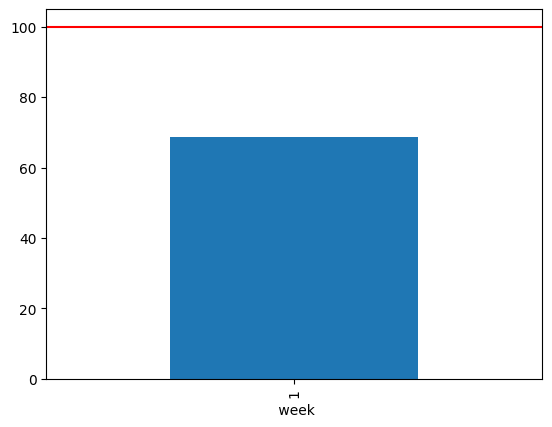

In [40]:
# Concat Current Food and Ate Out
food = pd.concat([current_food, ate_out], ignore_index=True, axis = 0)

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar')
weekly = food.groupby(' week')[' cost'].sum()

# Print Amount Under Budget
budget = 100
for i in range(1, len(weekly)+1):
    result = round(budget - weekly[i], 2)
    print("Week " + str(i) + ": $" + str(result) + " left")

# horizontal line
plt.axhline(y=100, color='r', linestyle='-')

### Calories

In [41]:
food['calories'] = food[' calories per serving'] * food[' servings left']
food.groupby(' week')['calories'].sum().head(5)


 week
1    18771.0
Name: calories, dtype: float64

day,1,2,3,4
week,,,,
1,2900.0,1960.0,2070.0,2330.0


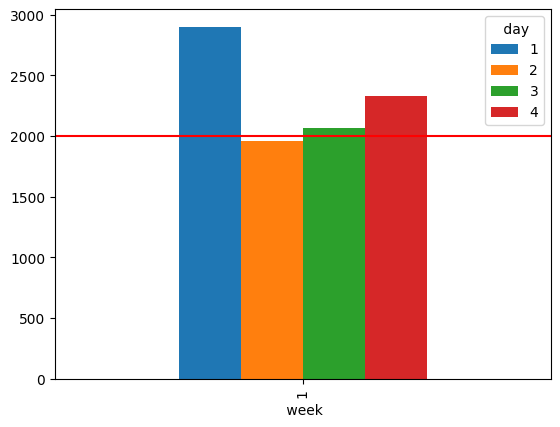

In [42]:
consumption = pd.read_csv('consumption.csv')
consumption.head(5)

import numpy as np
# pivot table of week and day
pivot = pd.pivot_table(consumption, values=' calories', index=[' week'],
                    columns=[' day'], aggfunc=np.sum)

# Plot Bar
pivot.plot(kind='bar')

#horizontal line at 2000
plt.axhline(y=2000, color='r', linestyle='-')

pivot.head(5)